# Pair Trading With Cryptocurrencies

## How To Implement A Pair Trading Strategy Using Python

## Introduction

### Provide Background 
...

### Provide Menu
...

Import packages

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pandas import Series, DataFrame

In [4]:
import pickle

In [5]:
import matplotlib.pyplot as plt

In [6]:
import statsmodels.api as sm

In [7]:
%matplotlib inline

## Data Preparation

Load data

In [8]:
with open('data_coinmarketcap.pickle', 'rb') as f:
    data = pickle.load(f)
    
f.close()

Check

In [9]:
data.head()

BTC                                               ETH           \
              Open    High     Low   Close Volume    Market Cap Open High Low   
2013-04-28  135.30  135.98  132.10  134.21    0.0  1.488567e+09  NaN  NaN NaN   
2013-04-29  134.44  147.49  134.00  144.54    0.0  1.603769e+09  NaN  NaN NaN   
2013-04-30  144.00  146.93  134.05  139.00    0.0  1.542813e+09  NaN  NaN NaN   
2013-05-01  139.00  139.89  107.72  116.99    0.0  1.298955e+09  NaN  NaN NaN   
2013-05-02  116.38  125.60   92.28  105.21    0.0  1.168517e+09  NaN  NaN NaN   

                     ...     XRP                           LTC              \
           Close     ...     Low Close Volume Market Cap  Open  High   Low   
2013-04-28   NaN     ...     NaN   NaN    NaN        NaN  4.30  4.40  4.18   
2013-04-29   NaN     ...     NaN   NaN    NaN        NaN  4.37  4.57  4.23   
2013-04-30   NaN     ...     NaN   NaN    NaN        NaN  4.40  4.57  4.17   
2013-05-01   NaN     ...     NaN   NaN    NaN        NaN  4.29  4.36  3.52   
2013-05-02   NaN     ...     NaN   NaN    NaN        NaN  3.78  4.04  3.01   

                                     
           Close Volume  Market Cap  
2013-04-28  4.35    0.0  74636938.0  
2013-04-29  4.38    0.0  75388964.0  
2013-04-30  4.30    0.0  74020918.0  
2013-05-01  3.80    0.0  65604596.0  
2013-05-02  3.37    0.0  58287979.0  

[5 rows x 24 columns]

In [10]:
data.tail()

BTC                                                         \
               Open     High      Low    Close        Volume    Market Cap   
2019-05-20  8196.92  8200.97  7678.78  7978.31  2.384340e+10  1.413157e+11   
2019-05-21  7977.97  8062.17  7843.34  7963.33  2.512725e+10  1.410656e+11   
2019-05-22      NaN      NaN      NaN      NaN           NaN           NaN   
2019-05-23      NaN      NaN      NaN      NaN           NaN           NaN   
2019-05-24      NaN      NaN      NaN      NaN           NaN           NaN   

               ETH                             ...            XRP            \
              Open    High    Low   Close      ...            Low     Close   
2019-05-20  261.27  261.55  241.8  251.86      ...       0.384647  0.398003   
2019-05-21  251.65  262.11  248.2  255.22      ...       0.389302  0.397603   
2019-05-22     NaN     NaN    NaN     NaN      ...            NaN       NaN   
2019-05-23     NaN     NaN    NaN     NaN      ...            NaN       NaN   
2019-05-24     NaN     NaN    NaN     NaN      ...            NaN       NaN   

                                          LTC                        \
                  Volume    Market Cap   Open    High    Low  Close   
2019-05-20  2.258367e+09  1.676255e+10  95.34   95.34  88.57  91.49   
2019-05-21  1.811582e+09  1.674573e+10  91.57   92.44  89.59  91.51   
2019-05-22           NaN           NaN  91.51   92.00  87.55  88.21   
2019-05-23           NaN           NaN  88.20   89.74  85.23  89.18   
2019-05-24           NaN           NaN  88.97  102.75  88.32  99.90   

                                        
                  Volume    Market Cap  
2019-05-20  3.566921e+09  5.659973e+09  
2019-05-21  3.145769e+09  5.662154e+09  
2019-05-22  3.398528e+09  5.459427e+09  
2019-05-23  3.208807e+09  5.520439e+09  
2019-05-24  5.393658e+09  6.185976e+09  

[5 rows x 24 columns]

Collect ids

In [11]:
id = list(data.columns.levels[0])

Create a dictionary

In [12]:
close_dict = {}

In [13]:
for i in id:
    close_dict[i] = data[i]['Close']

Convert the dictionary to a DataFrame

In [14]:
close = pd.DataFrame(close_dict)

Check

In [15]:
close.head()

,BTC,ETH,LTC,XRP
2013-04-28,134.21,NaN,4.35,NaN
2013-04-29,144.54,NaN,4.38,NaN
2013-04-30,139.00,NaN,4.30,NaN
2013-05-01,116.99,NaN,3.80,NaN
2013-05-02,105.21,NaN,3.37,NaN


In [16]:
close.tail()

,BTC,ETH,LTC,XRP
2019-05-20,7978.31,251.86,91.49,0.398003
2019-05-21,7963.33,255.22,91.51,0.397603
2019-05-22,NaN,NaN,88.21,NaN
2019-05-23,NaN,NaN,89.18,NaN
2019-05-24,NaN,NaN,99.90,NaN


In [17]:
close.describe()

,BTC,ETH,LTC,XRP
count,2215.000000,1384.000000,2218.000000,2117.000000
mean,2451.666005,204.419357,32.872976,0.176969
std,3363.891547,261.440400,52.720152,0.331741
min,68.430000,0.434829,1.160000,0.002810
25%,349.900000,10.722500,3.390000,0.006399
50%,631.110000,116.830000,4.810000,0.010140
75%,3906.335000,298.470000,46.805000,0.289678
max,19497.400000,1396.420000,358.340000,3.380000


## Pair Trading Strategy Implementation

### Define The Training And Test Sets
...

### Calculate The Spread Between BTC And Other Cryptos
#### Calculate The Hedge Ratio
...
#### Calculate The Spread
...

### Pair Trading Strategy
The pair trading strategy is inspired from from [E. Chan's book](https://www.amazon.com/Quantitative-Trading-Build-Algorithmic-Business/dp/0470284889/ref=sr_1_1?crid=39RKR1QE7L1BS&keywords=quantitative+trading&qid=1558788312&s=gateway&sprefix=quantitativ%2Caps%2C500&sr=8-1).
...

### Implementation

In [18]:
# Define training set
training_start = '2015-08-07'
training_end = '2016-08-01'
training_set = close[training_start:training_end]

# Define test set
test_start = '2016-08-02'
test_end = '2017-02-01'
test_set = close[test_start:test_end]

# Set crypto 1 to BTC
crypto_1 = id[0]

# Define entry and exit thresholds
entry_threshold = 1
exit_threshold = 0.5

# Initialize output
output = {id[1]: {},
          id[2]: {}, 
          id[3]: {}}

#
for i in range(1, len(id)):
    
    # Set crypto 2 to ETH, LTC and XRP
    crypto_2 = id[i]
    
    # Calculate the hedge ratio using the training set
    model = sm.OLS(training_set[crypto_1], training_set[crypto_2])
    result = model.fit()
    hedge_ratio = result.params[crypto_2]

    # Calculate the spread
    spread = close[crypto_1] - hedge_ratio * close[crypto_2]
    # Mean of the spread on the training set
    spread_mean = spread[training_start:training_end].mean()
    # Standard deviation of the spread calculated on the training set
    spread_std = spread[training_start:training_end].std()
    # Z-score of the spread
    z_score = (spread - spread_mean) / spread_std
    
    # Implement pair trading strategy
    # Create masks for long, short and exit positions
    longs = (z_score <= -entry_threshold)
    shorts = (z_score >= entry_threshold)
    exits = (np.abs(z_score) <= exit_threshold)
    # Initialize the positions
    positions = pd.DataFrame({crypto_1: np.nan * pd.Series(range(len(z_score))),
                              crypto_2: np.nan * pd.Series(range(len(z_score)))},
                             index=z_score.index)
    # Update the positions
    [positions[crypto_1][longs], positions[crypto_2][longs]] = [1, -1]
    [positions[crypto_1][shorts], positions[crypto_2][shorts]] = [-1, 1]
    [positions[crypto_1][exits], positions[crypto_2][exits]] = [0, 0]
    # Carry foward the positions except when there is an exit
    positions.fillna(method='ffill', inplace=True)
    # Lag the positions to the next day because we base calculations on close
    positions = positions.shift(periods=1)
    
    # Calculate the performance
    # Initialize the returns
    returns = pd.DataFrame({crypto_1: close[crypto_1],
                            crypto_2: close[crypto_2]})
    # Update the returns
    returns = returns.pct_change()
    # Calculate the pnl
    pnl = returns * positions
    pnl_net = pnl.sum(axis='columns')
    # Calculate the Sharpe ratio under the training set
    sharpe_training = np.sqrt(252) * pnl_net[training_start:training_end].mean() / pnl_net[training_start:training_end].std()
    # Calculate the Sharpe ratio under the test set
    sharpe_test = np.sqrt(252) * pnl_net[test_start:test_end].mean() / pnl_net[test_start:test_end].std()
    
    # Generate the output
    # Gather data
    data = {'spread': z_score,
            'positions': positions,
            'pnl': pnl_net,
            'sharpe training': sharpe_training,
            'sharpe test': sharpe_test}
    # Update the output
    output.update({crypto_2: data})
    

## Pair Trading Strategy Results

### Spread

Plot

(-6, 6)

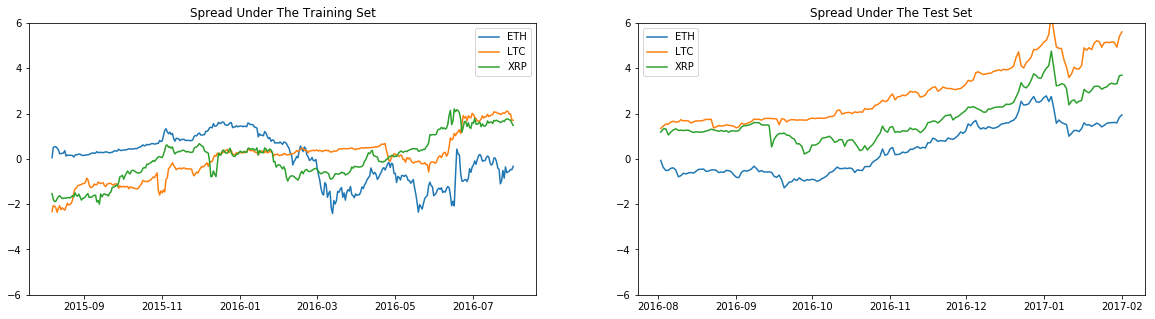

In [19]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
plt.plot(output['ETH']['spread'][training_start:training_end])
plt.plot(output['LTC']['spread'][training_start:training_end])
plt.plot(output['XRP']['spread'][training_start:training_end])
plt.title('Spread Under The Training Set')
plt.legend(['ETH', 'LTC', 'XRP'])
plt.ylim(-6, 6)

plt.subplot(1, 2, 2)
plt.plot(output['ETH']['spread'][test_start:test_end])
plt.plot(output['LTC']['spread'][test_start:test_end])
plt.plot(output['XRP']['spread'][test_start:test_end])
plt.title('Spread Under The Test Set')
plt.legend(['ETH', 'LTC', 'XRP'])
plt.ylim(-6, 6)

Remarks:
- ...
- ...
- ...

### Sharpe Ratio

Table

In [20]:
sharpe = pd.DataFrame({'BTC & ETH': [output['ETH']['sharpe training'], output['ETH']['sharpe test']],
                       'BTC & LTC': [output['LTC']['sharpe training'], output['LTC']['sharpe test']],
                       'BTC & XRP': [output['XRP']['sharpe training'], output['XRP']['sharpe test']]},
                      index=pd.MultiIndex.from_product([['Sharpe Ratio'], ['Training Set', 'Test Set']]))

In [21]:
sharpe

BTC & ETH  BTC & LTC  BTC & XRP
Sharpe Ratio Training Set   1.587326   0.644986   0.420515
             Test Set       0.467068  -1.464933  -0.192094

Remarks:
- ...
- ...
- ...

### PnL

Plot

(-0.5, 3)

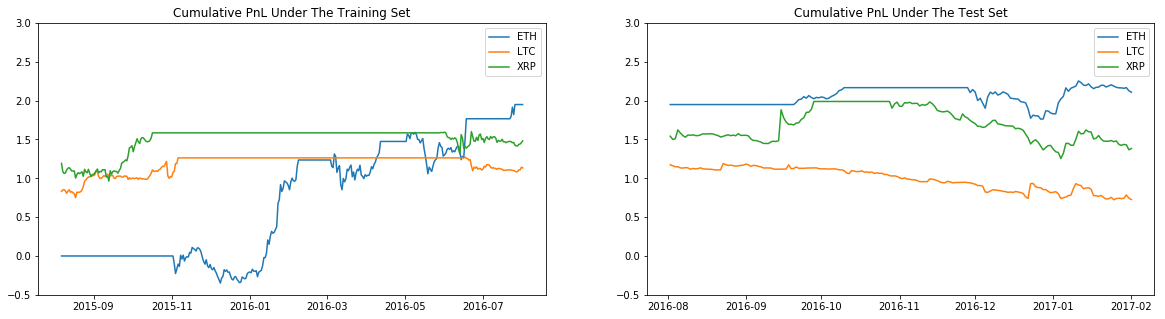

In [22]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
plt.plot(output['ETH']['pnl'].cumsum()[training_start:training_end])
plt.plot(output['LTC']['pnl'].cumsum()[training_start:training_end])
plt.plot(output['XRP']['pnl'].cumsum()[training_start:training_end])
plt.title('Cumulative PnL Under The Training Set')
plt.legend(['ETH', 'LTC', 'XRP'])
plt.ylim(-0.5, 3)

plt.subplot(1, 2, 2)
plt.plot(output['ETH']['pnl'].cumsum()[test_start:test_end])
plt.plot(output['LTC']['pnl'].cumsum()[test_start:test_end])
plt.plot(output['XRP']['pnl'].cumsum()[test_start:test_end])
plt.title('Cumulative PnL Under The Test Set')
plt.legend(['ETH', 'LTC', 'XRP'])
plt.ylim(-0.5, 3)

Remarks:
- ...
- ...
- ...

## Conclusion

### Review The Main Takeaways
...

### Provide A Preview Of What Is Next (If There Is One)
...